In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Reference lines: horizontal, vertical, and diagonal

These geoms add reference lines (sometimes called rules) to a plot, either horizontal, vertical, or diagonal (specified by slope and intercept). These are useful for annotating plots  
<b style = 'color:red'>NOTE: they span the whole axes (like `plt.axhline`, `plt.axvline`)</b>

```R
geom_abline(
  mapping = NULL,
  data = NULL,
  ...,
  slope,
  intercept,
  na.rm = FALSE,
  show.legend = NA
)

geom_hline(
  mapping = NULL,
  data = NULL,
  ...,
  yintercept,
  na.rm = FALSE,
  show.legend = NA
)

geom_vline(
  mapping = NULL,
  data = NULL,
  ...,
  xintercept,
  na.rm = FALSE,
  show.legend = NA
)
```

**Arguments**  
`xintercept`, `yintercept`, `slope`, `intercept`	
Parameters that control the position of the line. If these are set, data, mapping and show.legend are overridden.

**Details**
These geoms act slightly differently from other geoms. You can supply the parameters in two ways: either as arguments to the layer function, or via aesthetics. If you use arguments, e.g. geom_abline(intercept = 0, slope = 1), then behind the scenes the geom makes a new data frame containing just the data you've supplied. That means that the lines will be the same in all facets; if you want them to vary across facets, construct the data frame yourself and use aesthetics.

Unlike most other geoms, these geoms do not inherit aesthetics from the plot default, because they do not understand x and y aesthetics which are commonly set in the plot. They also do not affect the x and y scales.

### Aesthetic

These geoms are drawn using with `geom_line()` so support the same aesthetics: alpha, colour, linetype and size. They also each have aesthetics that control the position of the line:

`geom_vline()`: xintercept

`geom_hline()`: yintercept

`geom_abline()`: slope and intercept

In [15]:
x <- seq(-pi, pi, length.out = 100)
y = sin(x)

func <- data.frame(x, y)

fig <- ggplot(func, aes(x, y)) + geom_line(color = 'red')

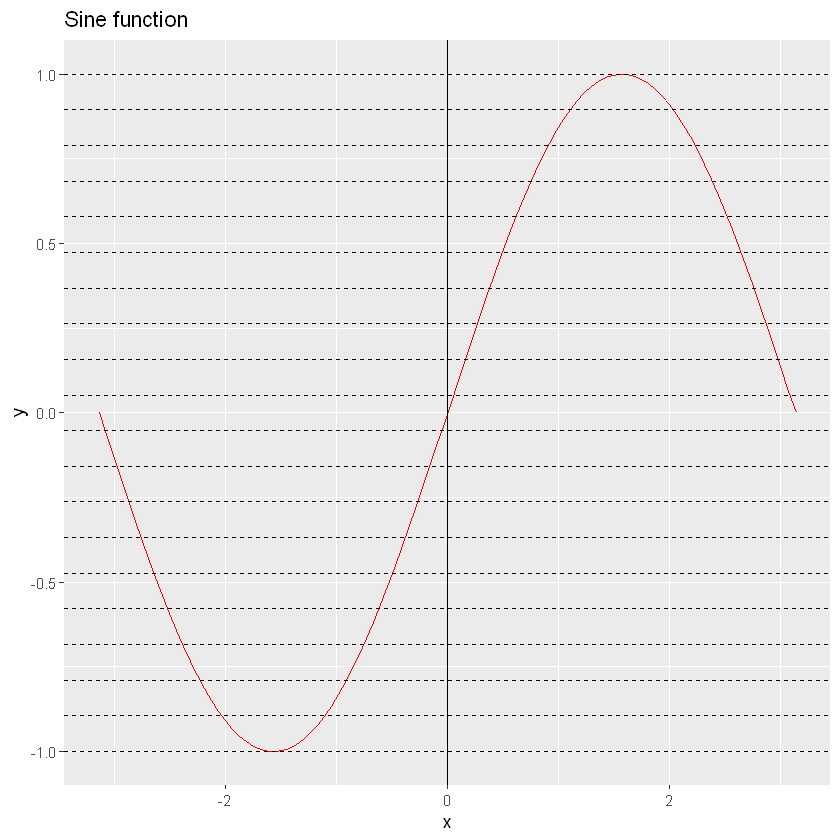

In [23]:
#fixed value
fig + 
geom_vline(xintercept = 0) +
geom_hline(yintercept = seq(-1, 1, length.out = 20),
           linetype = 'dashed') +
labs(title = 'Sine function')

In [24]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


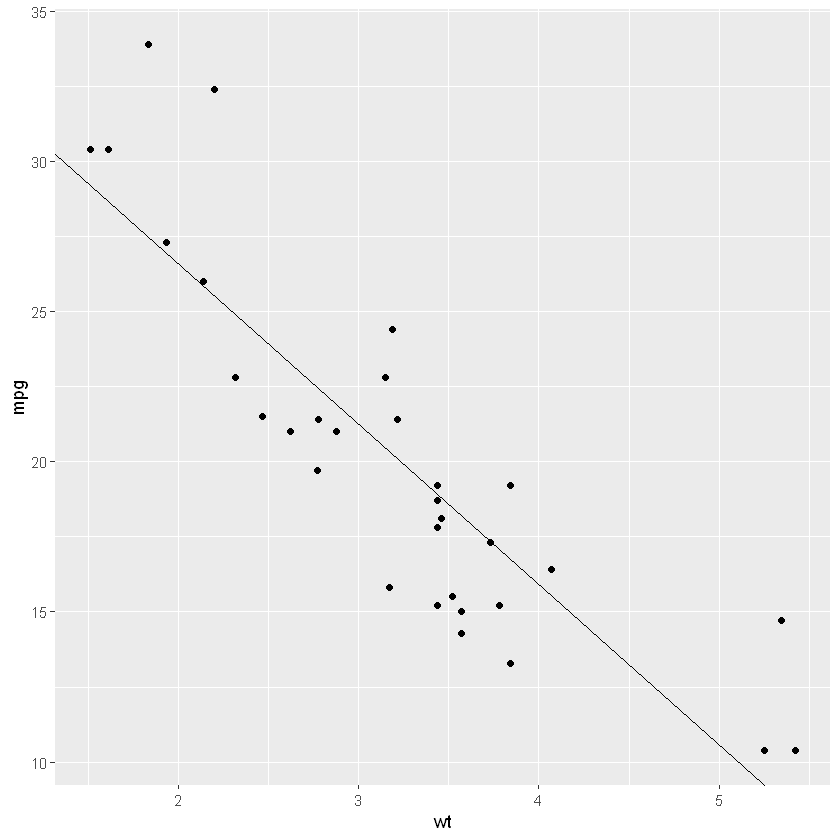

In [28]:
#correlation between weights and mile per gallon
x <- mtcars$wt
y <- mtcars$mpg
n <- nrow(mtcars)

#calculate parameters
m <- (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x ^ 2) - sum(x) ^ 2)
b <- (sum(y) - m * sum(x)) / n
ggplot(mtcars, aes(wt, mpg)) + geom_point() +
geom_abline(slope = m, intercept = b)

# Line segments parameterised by location, direction and distance

This is a polar parameterisation of **`geom_segment()`**. It is useful when you have variables that describe direction and distance. The angles start from east and increase counterclockwise.

```R
geom_spoke(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

### Aesthetic

`geom_spoke()` understands the following aesthetics (required aesthetics are in bold):

**x**

**y**

**angle**

**radius**

alpha

colour

group

linetype

size

In [32]:
theta <- seq(0, 2 * pi, length.out = 16)
r <- 3
x <- 0
y <- 0
v <- data.frame(r, theta, x, y)
v

r,theta,x,y
3,0.000000,0,0
3,0.418879,0,0
3,0.837758,0,0
3,1.256637,0,0
3,1.675516,0,0
3,2.094395,0,0
3,2.513274,0,0
3,2.932153,0,0
3,3.351032,0,0
3,3.769911,0,0


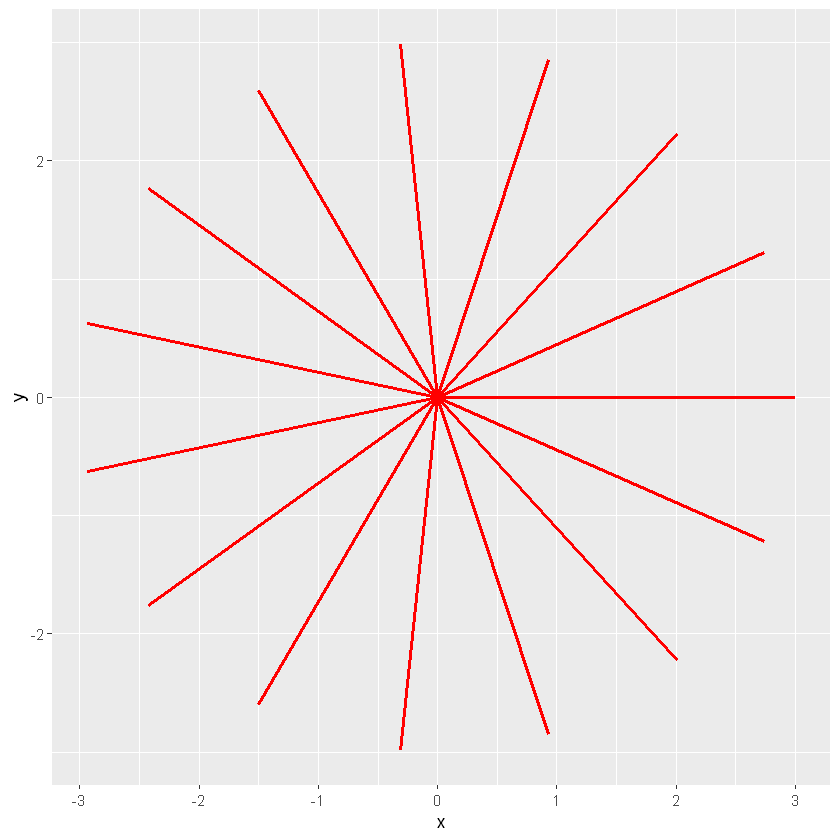

In [35]:
ggplot(v, aes(x = x, y = y, radius = r, angle = theta)) +
geom_spoke(color = 'red', size = 1)

# Line segment

<b style = 'color:red'>See <a href = './primitives.ipynb'>ggplot2 Primitives Notebook</a> for more details

**`geom_segment()`**

In [36]:
args(geom_segment)

function (mapping = NULL, data = NULL, stat = "identity", position = "identity", 
    ..., arrow = NULL, arrow.fill = NULL, lineend = "butt", linejoin = "round", 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

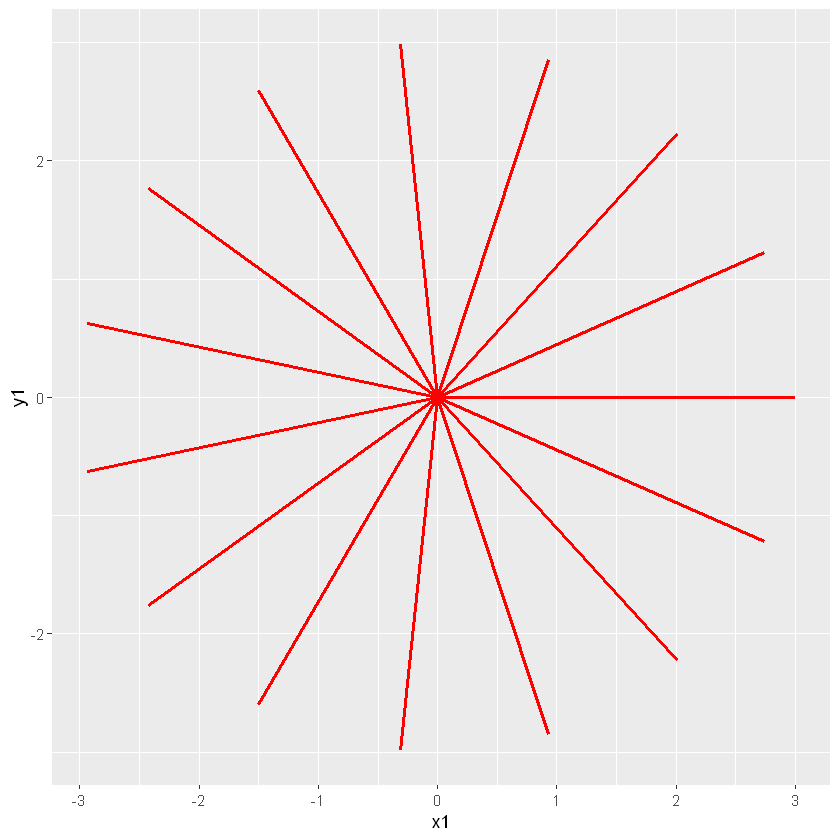

In [42]:
#translate from polar coordinate system to cartesian coordinate system
v1 <- data.frame(x1 = x, y1 = y, x2 = r * cos(theta), y2 = r * sin(theta))

ggplot(v1, aes(x = x1, y = y1, xend = x2, yend = y2)) +
geom_segment(color = 'red', size = 1)